In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from mlxtend.data import iris_data
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.gridspec as gridspec

In [2]:
X, y = iris_data()
X = X[:,[0, 2]]

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [4]:
model= KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9666666666666667

In [13]:
tree= DecisionTreeClassifier(random_state=42,max_depth=5,max_leaf_nodes=3) # using the random state for reproducibility
forest= RandomForestClassifier(random_state=42,max_depth=5,max_leaf_nodes=3,n_estimators=200)
knn= KNeighborsClassifier()
svm= SVC(random_state=42)
xboost= XGBClassifier(random_state=42)
lr= LogisticRegression(random_state=42)

models= [tree,forest,knn,svm,xboost,lr]

for model in models:
   model.fit(X_train,y_train)
   y_pred= model.predict(X_test) # then predict on the test set
   accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
   clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
   print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
   print(clf_report)
   print("\n")
   print()


The accuracy of model DecisionTreeClassifier is 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30




The accuracy of model RandomForestClassifier is 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30




The accuracy of model KNeighborsClassifier is 0.97
              precision    recall  f1-score   support

           0       1

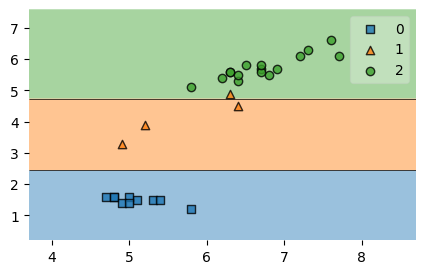

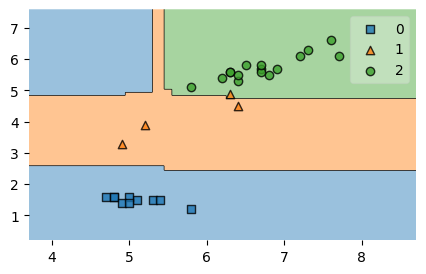

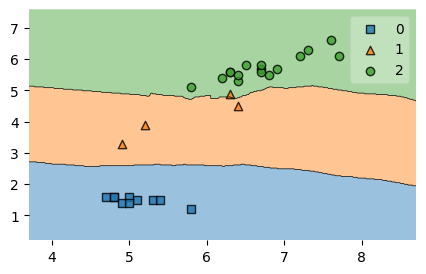

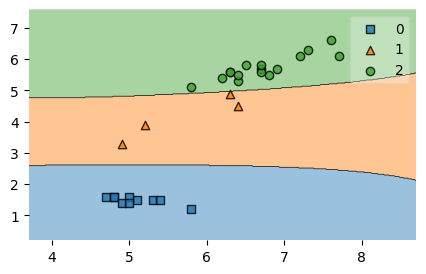

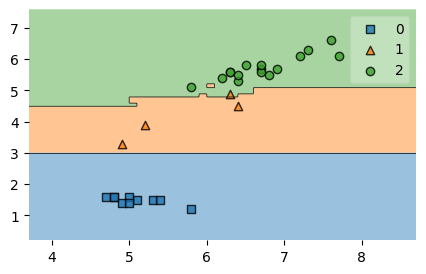

In [ ]:

for model in models:
   model.fit(X_train,y_train)
   gs = gridspec.GridSpec(2, 2)
   fig = plt.figure(figsize=(5, 3))
   plot_decision_regions(X_test,y_test,clf= model,n_jobs=-1)
   plt.show()
